# Project Name: Loan Status Prediction


The following are variables in the Dataset:

- Loan_ID: A unique loan ID.
- Gender: Either male or female.
- Married: Weather Married(yes) or Not Marttied(No).
- Dependents: Number of persons depending on the client.
- Education: Applicant Education(Graduate or Undergraduate).
- Self_Employed: Self-employed (Yes/No).
- Applicant Income: Applicant income.
- CoapplicantIncome: Co-applicant income.
- LoanAmount: Loan amount in thousands.
- Loan_Amount_Term: The terms of the loan are in months.
- Credit_History: Credit history meets guidelines.
- Property_Area: Applicants are living either Urban, Semi-Urban or Rural.
- Loan_Status: Loan approved (Y/N).


# Data Reading and Reviewing

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\l\Downloads\Loan Status Prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


Observation:

- We can see that in the data Gender, Education, employment status and thier respective credit scores are most important variables to predict of the people are getting thier loans approved or not? i.e 
loan_status will be our target variable to predict

# Data Cleaning

### Checking Datatype of Variables

In [4]:
df.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes          0  Not Graduate            No   
3    LP001008    Male      No          0      Graduate            No   
4    LP001013    Male     Yes          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
376  LP002953    Male     Yes         3+      Graduate            No   
377  LP002974    Male     Yes          0      Graduate            No   
378  LP002978  Female      No          0      Graduate            No   
379  LP002979    Male     Yes         3+      Graduate            No   
380  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583        

Observation:
- Column 'Dependents' have some values in strings (3+) we have to convert them into numerical

In [34]:
df['Dependents'] = df['Dependents'].replace('3+', 3)

df['Dependents'] = pd.to_numeric(df['Dependents'])

print(df)

     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          0       1        1           1          0              0   
1          1       1        1           0          0              1   
2          2       1        1           0          1              0   
3          3       1        0           0          0              0   
4          4       1        1           0          1              0   
..       ...     ...      ...         ...        ...            ...   
376      376       1        1           3          0              0   
377      377       1        1           0          0              0   
378      378       0        0           0          0              0   
379      379       1        1           3          0              0   
380      380       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583             1508.0       128.0             360.0   
1

### Checking Null Values

In [5]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
import pandas as pd
import numpy as np

In [11]:
df['Dependents'] = df.groupby('Married')['Dependents'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.dropna().max()))
df['Loan_Amount_Term'] = df.groupby(['Education', 'Property_Area'])['Loan_Amount_Term'].transform(lambda x: x.fillna(x.median()))
df['Credit_History'] = df.groupby('Property_Area')['Credit_History'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))

mode_gender = df['Gender'].mode()[0]
mode_self_employed = df['Self_Employed'].mode()[0]

df['Gender'].fillna(mode_gender, inplace=True)
df['Self_Employed'].fillna(mode_self_employed, inplace=True)

print(df)


      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes          0  Not Graduate            No   
3    LP001008    Male      No          0      Graduate            No   
4    LP001013    Male     Yes          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
376  LP002953    Male     Yes         3+      Graduate            No   
377  LP002974    Male     Yes          0      Graduate            No   
378  LP002978  Female      No          0      Graduate            No   
379  LP002979    Male     Yes         3+      Graduate            No   
380  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583             1508.0       128.0           

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Obversation:
- Dataset has many columns and rows with categorical data and we have to convert them into numerical using label encoding method, and also Dependents, Loan_Amount_Term, Credit_History, Gender and Self_Employed columns had missing values. By using the mean, mode and median imputers we have filled the missing values and Data is clean now.

# Label Encoding

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [31]:
label_encoder = LabelEncoder()

columns_to_encode = ['Gender', 'Married', 'Education', 'Self_Employed','Property_Area', 'Loan_Status', 'Loan_ID']

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [32]:
print(df)

     Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0          0       1        1          1          0              0   
1          1       1        1          0          0              1   
2          2       1        1          0          1              0   
3          3       1        0          0          0              0   
4          4       1        1          0          1              0   
..       ...     ...      ...        ...        ...            ...   
376      376       1        1         3+          0              0   
377      377       1        1          0          0              0   
378      378       0        0          0          0              0   
379      379       1        1         3+          0              0   
380      380       0        0          0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583             1508.0       128.0             360.0   
1            

Observation:
- Many columns in dataset like 'Gender', 'Married', 'Education', 'Self_Employed','Property_Area', 'Loan_Status', 'Loan_ID' had categorical values  by using label incoding the values are turned into numerical

# Exploratory Data Analysis

### 1. Histograms and Box Plots

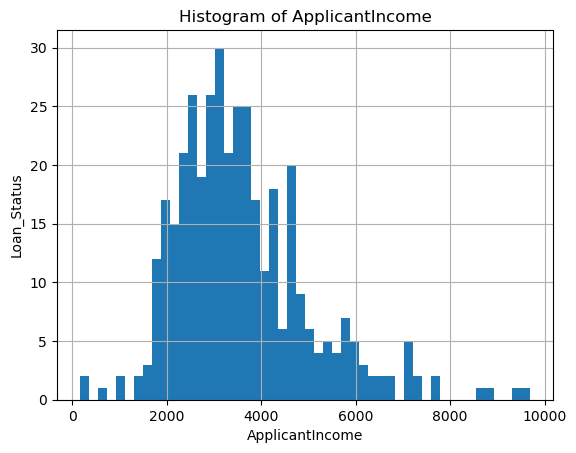

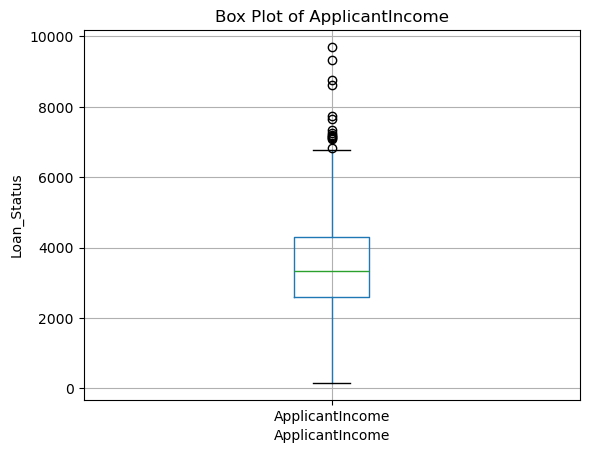

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df['ApplicantIncome'].hist(bins=50)
plt.title('Histogram of ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Loan_Status')
plt.show()

df.boxplot(column='ApplicantIncome')
plt.title('Box Plot of ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Loan_Status')
plt.show()

Observation: 
- After using histplot and Box Plot we can observe that applicants with income of more than 6000 are the significant outliers in our data

### Checking Skewness

In [35]:
skewness = df.skew()
print(skewness)

Loan_ID              0.000000
Gender              -1.335495
Married             -0.403147
Dependents           1.169190
Education            1.038274
Self_Employed        2.837288
ApplicantIncome      1.119751
CoapplicantIncome    8.660692
LoanAmount          -0.804282
Loan_Amount_Term    -2.253633
Credit_History      -1.972497
Property_Area       -0.091709
Loan_Status         -0.936181
dtype: float64


Observation:
- We can see numerical columns like  ApplicantIncome, CoapplicantIncome, Dependents, and Loan_Amount_Term. have higher skewness 

### Handling Skewness

#### 1. Log Transformation: for  ApplicantIncome, CoapplicantIncome, Dependents, and Loan_Amount_Term.


In [37]:
import numpy as np

df['ApplicantIncome_log'] = np.log(df['ApplicantIncome'] + 1)
df['CoapplicantIncome_log'] = np.log(df['CoapplicantIncome'] + 1)
df['LoanAmount_log'] = np.log(df['LoanAmount'] + 1)
df['Dependents_log'] = np.log(df['Dependents'] + 1)

In [40]:
New_skewness = df[['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log', 'Dependents_log']].skew()
print(New_skewness)

ApplicantIncome_log     -1.642001
CoapplicantIncome_log   -0.120231
LoanAmount_log          -2.181560
Dependents_log           0.852382
dtype: float64


Observation:
- We can see the skewness is quite balanced compared to before

### Transformation of Old Variables in New

In [42]:
df['ApplicantIncome'] = df['ApplicantIncome_log']
df['CoapplicantIncome'] = df['CoapplicantIncome_log']
df['LoanAmount'] = df['LoanAmount_log']
df['Dependents'] = df['Dependents_log']

df.drop(['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log', 'Dependents_log'], axis=1, inplace=True)

# Data Preprocessing for Model Building


### Splitting the Data to Get Training and Testing Data

In [48]:
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)
print(X.head())


   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        1    0.693147          0              0         8.430327   
1       1        1    0.000000          0              1         8.006701   
2       1        1    0.000000          1              0         7.857094   
3       1        0    0.000000          0              0         8.699681   
4       1        1    0.000000          1              0         7.755339   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0           7.319202    4.859812             360.0             1.0   
1           0.000000    4.204693             360.0             1.0   
2           7.765993    4.795791             360.0             1.0   
3           0.000000    4.955827             360.0             1.0   
4           7.324490    4.564348             360.0             1.0   

   Property_Area  
0              0  
1              2  
2              2  
3              2  
4              2  


In [51]:
y= df['Loan_Status']
y

0      0
1      1
2      1
3      1
4      1
      ..
376    1
377    1
378    1
379    1
380    0
Name: Loan_Status, Length: 381, dtype: int64

### Model Building

In [49]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)


(304, 11) (77, 11)


In [55]:
from sklearn.linear_model import LogisticRegression

In [57]:
lr=LogisticRegression()
lr

LogisticRegression()

### Prediction

In [59]:
lr.fit(X_train,y_train)
lr

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
y_pred=lr.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### Scoring

In [66]:
lr.score(X_train, y_train)

0.8519736842105263

In [67]:
lr.score(X_test, y_test)

0.8181818181818182

### Model Evaluation


In [68]:
from sklearn.metrics import  accuracy_score, confusion_matrix

In [69]:
accuracy_score(y_test,y_pred)

0.8181818181818182

In [70]:
confusion_matrix(y_test, y_pred)

array([[ 7, 14],
       [ 0, 56]], dtype=int64)

# Final Analysis:
- After checking the model score and model evaluation the Machine Learning testing model is 80% accurate